In [2]:
### Import libraries
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps
import cartopy
import matplotlib
from netCDF4 import Dataset
from xarray import DataArray
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
import metpy

#import basemap
import geopandas as gpd
#import descartes
import wrf

import dask.base
from dask.base import tokenize
import dask

print('Done importing libraries')

Done importing libraries


In [3]:
# Plot the terrain
# Now, lets plot with the fire perimeter on top.
font_size = 16

outer = xr.open_dataset('/projects/tita6191/fire/01_geosmoothing/geogrid/geo_em.d01.nc')
inner = xr.open_dataset('/projects/tita6191/fire/01_geosmoothing/geogrid/geo_em.d02.nc')

lats = outer['XLAT_M'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs = outer['XLONG_M'].isel(Time=0)
heights = outer['HGT_M'].isel(Time=0)

min_lat = lats.values.min()
max_lat = lats.values.max()
min_lon = longs.values.min()
max_lon = longs.values.max()

fig, ax = plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
terrain_levels = np.arange(1000, 4000, 1)

im = ax.contourf(inner['XLONG_M'].values[0, :, :],
    inner['XLAT_M'].values[0, :, :],
    inner['HGT_M'].values[0, :, :], terrain_levels,
    cmap=plt.cm.terrain)

ax.set_ylabel("Latitude [deg]", fontsize= font_size)
ax.set_xlabel("Longitude [deg]", fontsize= font_size)
plt.xlim([min_lon, max_lon])
plt.ylim([min_lat, max_lat])

ax.tick_params(axis='x', labelsize= font_size)
ax.tick_params(axis='y', labelsize= font_size)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])                 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Terrain height [m]",fontsize= font_size)
cbar.ax.tick_params(labelsize=font_size-2)

plt.show()

NameError: name 'xr' is not defined

In [ ]:
print(heights.values.max())
print(lats.values.max())
print(lats.values.min())
print(longs.values.max())
print(longs.values.min())

In [36]:
def terrainplot(filename, saveimage = False, showimage = True, title_string = None):    
    # Open up the WRF dataset provided
    terrain = xr.open_dataset(filename)
    lats = terrain['XLAT_M'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
    longs = terrain['XLONG_M'].isel(Time=0)
    heights = terrain['HGT_M'].isel(Time=0)
    
    min_lat = lats.values.min()
    max_lat = lats.values.max()
    min_lon = longs.values.min()
    max_lon = longs.values.max()
    
    # Create plot
    fig, ax = plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
    
    # Plot the terrain data from WRF_OUTPUT
    terrain_levels = np.arange(2200, 3100, 1)
    im = ax.contourf(terrain['XLONG_M'].values[0, :, :],
        terrain['XLAT_M'].values[0, :, :],
        terrain['HGT_M'].values[0, :, :], terrain_levels,
        cmap=plt.cm.terrain)

    # Set up plotting
    font_size = 16
    ax.set_ylabel("Latitude [deg]", fontsize = font_size)
    ax.set_xlabel("Longitude [deg]", fontsize = font_size)
    if title_string != None:
        plt.title(title_string, fontsize = font_size)
    plt.xlim([min_lon, max_lon])
    plt.ylim([min_lat, max_lat])
    
    print([min_lon, max_lon])
    print([min_lat, max_lat])
    
    ax.tick_params(axis='x', labelsize= font_size)               
    ax.tick_params(axis='y', labelsize= font_size)

    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)


    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label("Terrain height [m]",fontsize= font_size)
    cbar.ax.tick_params(labelsize=font_size-2)
    
    if saveimage == True:
        plt.savefig("terrain.png")    
    if showimage == True:
        plt.show()
    plt.close()
    

[-106.31976, -105.89642]
[40.069893, 40.311947]


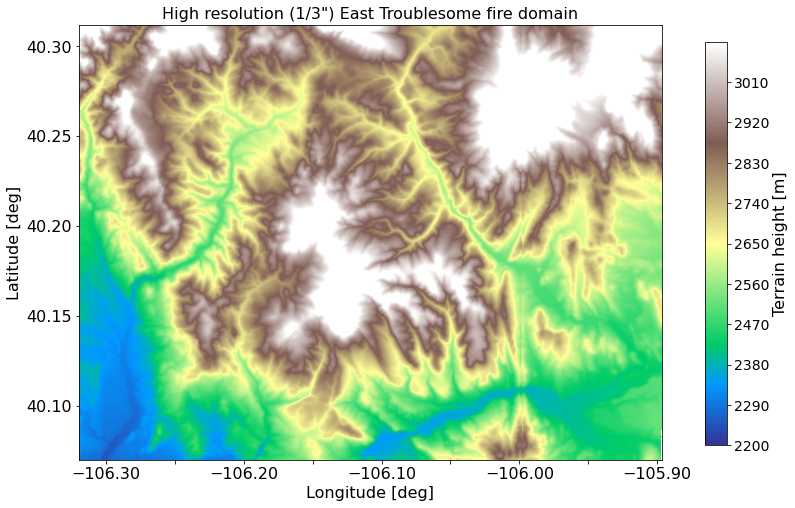

[-106.31976, -105.89642]
[40.069893, 40.311947]


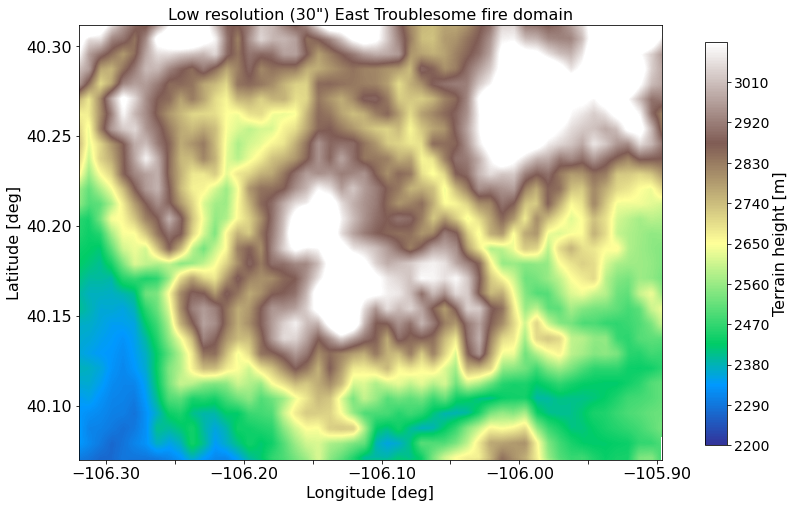

In [48]:
import xarray as xr                 # For dealing with netCDF data
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting

terrainplot('/projects/tita6191/fire/01_geosmoothing/geogrid/geo_em.d02.nc', title_string = 'High resolution (1/3") East Troublesome fire domain')

terrainplot('/projects/tita6191/wrf_tutorial/fire_tutorial/geo_em.d02.nc', title_string = 'Low resolution (30") East Troublesome fire domain')

In [67]:
terrain = xr.open_dataset('/projects/tita6191/fire/01_geosmoothing/geogrid/geo_em.d02.nc')
lats = terrain['XLAT_M'].isel(Time=0)    # Note: we must index-select Time=0 because plots expect 2D data (lat-lon)
longs = terrain['XLONG_M'].isel(Time=0)
heights = terrain['HGT_M'].isel(Time=0)

print(np.shape(heights))

np.where(longs.values < -105.99)
np.where(longs.values > -106.01)

print(longs.values[100,220:260])
print(heights.values[100,220:260])

#unique, counts = np.unique(array, return_counts=True)
#result = np.column_stack((unique, counts)) 
#print (result)



(243, 324)
[-106.0316   -106.03029  -106.02899  -106.02768  -106.02637  -106.025055
 -106.02374  -106.022446 -106.02113  -106.01984  -106.018524 -106.01721
 -106.0159   -106.01459  -106.01329  -106.01198  -106.01068  -106.00937
 -106.00806  -106.006744 -106.00543  -106.004135 -106.00282  -106.001526
 -106.00021  -105.9989   -105.99759  -105.99628  -105.99498  -105.99367
 -105.99237  -105.99106  -105.989746 -105.988434 -105.98712  -105.985825
 -105.98451  -105.983215 -105.9819   -105.98059 ]
[2956.9854 2963.0745 2946.459  2906.1392 2838.147  2786.7432 2755.3052
 2746.6992 2755.3228 2735.068  2691.3904 2653.2402 2625.1187 2617.5728
 2593.1846 2647.6064 2724.4216 2734.148  2676.0469 2635.0312 2609.7957
 2589.938  2574.6716 2560.0918 2543.0098 2535.545  2550.8447 2539.135
 2532.995  2516.0093 2510.0342 2506.0176 2497.414  2497.913  2497.9492
 2498.1965 2524.5159 2588.0562 2566.5996 2573.129 ]
